In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

### EDA for Germany

In [19]:
df_ger = pd.read_csv("data-ger.csv")
df_ger = df_ger.drop(columns=["Unnamed: 0"], axis=1)
df_ger

,id,gen,sp,ssp,en,rec,cnt,loc,lat,lng,...,date,uploaded,also,rmk,bird-seen,playback-used,sono.small,sono.med,sono.large,sono.full
0,709930,Turdus,viscivorus,NaN,Mistle Thrush,Sven Kransel,Germany,"Hanover Region (near Uetze), Lower Saxony",52.4351,10.1250,...,2022-03-05,2022-03-20,[''],Tascam DR-05X – unattended-72h-recording - not...,no,no,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...
1,639796,Turdus,viscivorus,NaN,Mistle Thrush,Sven Kransel,Germany,"Uelzen (near Eimke), Niedersachsen",52.9549,10.2820,...,2021-04-17,2021-04-17,"['Picus viridis', 'Phylloscopus trochilus', 'P...",NaN,yes,no,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...,//xeno-canto.org/sounds/uploaded/ZQQGDKDOZQ/ff...
2,626430,Turdus,viscivorus,NaN,Mistle Thrush,Jochen Völlm,Germany,"Enzkreis (near Pforzheim), Karlsruhe, Baden-W...",48.8653,8.7640,...,2021-02-28,2021-03-05,"['Parus major', 'Poecile palustris']",NaN,yes,no,//xeno-canto.org/sounds/uploaded/GAJUUNGKMM/ff...,//xeno-canto.org/sounds/uploaded/GAJUUNGKMM/ff...,//xeno-canto.org/sounds/uploaded/GAJUUNGKMM/ff...,//xeno-canto.org/sounds/uploaded/GAJUUNGKMM/ff...
3,596276,Turdus,viscivorus,NaN,Mistle Thrush,W. Agster,Germany,"Frankfurt am Main, Darmstadt, Hessen",50.1684,8.7580,...,2020-10-13,2020-10-19,[''],NaN,yes,no,//xeno-canto.org/sounds/uploaded/EXNUFPZKKY/ff...,//xeno-canto.org/sounds/uploaded/EXNUFPZKKY/ff...,//xeno-canto.org/sounds/uploaded/EXNUFPZKKY/ff...,//xeno-canto.org/sounds/uploaded/EXNUFPZKKY/ff...
4,563155,Turdus,viscivorus,NaN,Mistle Thrush,Frank Holzapfel,Germany,"Naturpark Stromberg-Heuchelberg, Baden-Württem...",49.0211,9.0244,...,2020-03-28,2020-05-29,[''],Unattended recording from frequently used fore...,no,no,//xeno-canto.org/sounds/uploaded/NKZQLCJFUU/ff...,//xeno-canto.org/sounds/uploaded/NKZQLCJFUU/ff...,//xeno-canto.org/sounds/uploaded/NKZQLCJFUU/ff...,//xeno-canto.org/sounds/uploaded/NKZQLCJFUU/ff...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27654,701009,Parus,major,NaN,Great Tit,Beatrix Saadi-Varchmin,Germany,"Dorfende Stoffen (near Lengenfeld), Oberbayer...",48.0058,10.9024,...,2022-01-18,2022-02-08,"['Corvus frugilegus', 'Anser anser']",NaN,yes,no,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...
27655,700066,Parus,major,NaN,Great Tit,Beatrix Saadi-Varchmin,Germany,"Dorfende Stoffen (near Lengenfeld), Oberbayer...",48.0058,10.9024,...,2022-01-18,2022-02-02,[''],this full moon day all Great Tits seem to sin...,yes,no,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...
27656,699939,Parus,major,NaN,Great Tit,Beatrix Saadi-Varchmin,Germany,"Kirchstr. 23, Hagenheim/Hofstetten, near Land...",47.9984,10.9503,...,2021-12-24,2022-02-01,[''],"weather about 0°C, mild. A Great Tit sings its...",yes,no,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...,//xeno-canto.org/sounds/uploaded/OQZFKFTAKD/ff...
27657,699168,Parus,major,NaN,Great Tit,Mathias Götz,Germany,"München (near Taufkirchen), Oberbayern, Bayern",48.0481,11.6020,...,2022-01-26,2022-01-28,[''],NaN,no,no,//xeno-canto.org/sounds/uploaded/FYXGIECAUP/ff...,//xeno-canto.org/sounds/uploaded/FYXGIECAUP/ff...,//xeno-canto.org/sounds/uploaded/FYXGIECAUP/ff...,//xeno-canto.org/sounds/uploaded/FYXGIECAUP/ff...


In [20]:
df_ger.columns

Index(['id', 'gen', 'sp', 'ssp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng',
       'alt', 'type', 'url', 'file', 'file-name', 'lic', 'q', 'length', 'time',
       'date', 'uploaded', 'also', 'rmk', 'bird-seen', 'playback-used',
       'sono.small', 'sono.med', 'sono.large', 'sono.full'],
      dtype='object')

In [21]:
# A high number of unknown values for subspecies. 

df_ger["ssp"].isna().value_counts()

True     26535
False     1124
Name: ssp, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sonus'),
  Text(1, 0, 'Turdus'),
  Text(2, 0, 'Sylvia'),
  Text(3, 0, 'Phylloscopus'),
  Text(4, 0, 'Parus'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Emberiza'),
  Text(7, 0, 'Corvus'),
  Text(8, 0, 'Erithacus'),
  Text(9, 0, 'Acrocephalus')])

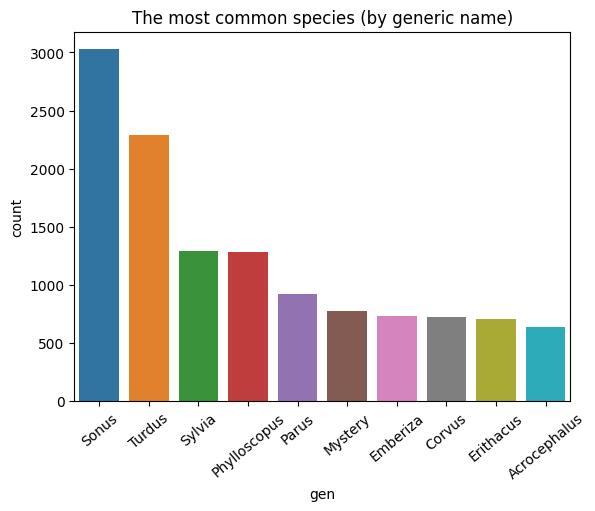

In [22]:
# Count Top 5 species by generic name

sns.countplot(x="gen", data=df_ger, order=df_ger.gen.value_counts().index[:10])
plt.title("The most common species (by generic name)")
plt.xticks(rotation=40)

In [23]:
df_ger.gen.value_counts().head()

Sonus           3028
Turdus          2287
Sylvia          1292
Phylloscopus    1285
Parus            924
Name: gen, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'naturalis'),
  Text(1, 0, 'major'),
  Text(2, 0, 'merula'),
  Text(3, 0, 'mystery'),
  Text(4, 0, 'collybita'),
  Text(5, 0, 'atricapilla'),
  Text(6, 0, 'rubecula'),
  Text(7, 0, 'philomelos'),
  Text(8, 0, 'palustris'),
  Text(9, 0, 'coelebs')])

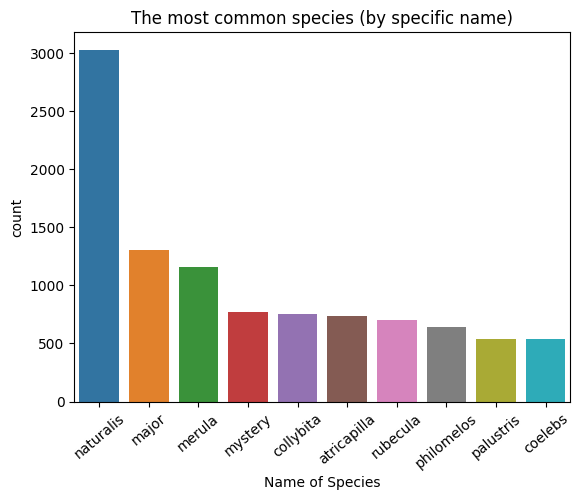

In [24]:
# Count of species by specific name (epithet)

sns.countplot(x="sp", data=df_ger, order=df_ger.sp.value_counts().index[:10])
plt.title("The most common species (by specific name)")
plt.xlabel("Name of Species")
plt.xticks(rotation=40)

In [25]:
df_ger.sp.value_counts().head(10)

naturalis      3028
major          1300
merula         1155
mystery         773
collybita       753
atricapilla     734
rubecula        704
philomelos      644
palustris       540
coelebs         538
Name: sp, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Soundscape'),
  Text(1, 0, 'Common Blackbird'),
  Text(2, 0, 'Great Tit'),
  Text(3, 0, 'Identity unknown'),
  Text(4, 0, 'Common Chiffchaff')])

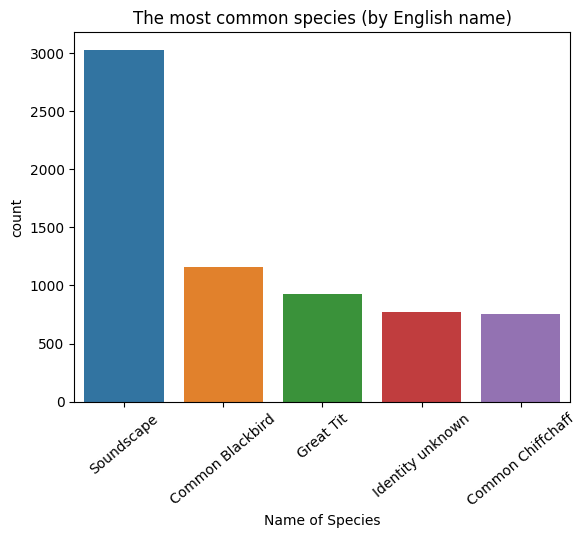

In [26]:
# Count of species by English name
# Soundscape refers to a recording which contains more than one species 
# and can therefore not be assigned to a single species.
# More info at https://xeno-canto.org/help/FAQ#soundscape

sns.countplot(x="en", data=df_ger, order=df_ger.en.value_counts().index[:5])
plt.title("The most common species (by English name)")
plt.xlabel("Name of Species")
plt.xticks(rotation=40)

In [27]:
print(df_ger.en.value_counts()[:10])

Soundscape           3028
Common Blackbird     1155
Great Tit             924
Identity unknown      773
Common Chiffchaff     753
Eurasian Blackcap     734
European Robin        704
Song Thrush           644
Common Chaffinch      538
Eurasian Blue Tit     423
Name: en, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'johannes buhl'),
  Text(1, 0, 'Frank Holzapfel'),
  Text(2, 0, 'brickegickel'),
  Text(3, 0, 'Sonnenburg'),
  Text(4, 0, 'Buhl Johannes')])

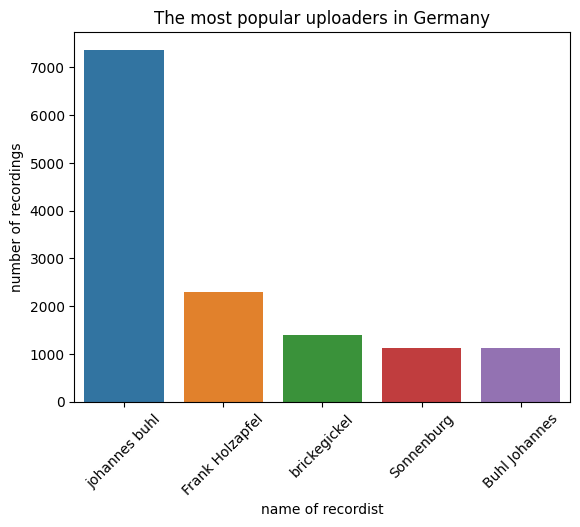

In [35]:
# Top 5 recordists in Germany

sns.countplot(x="rec", data=df_ger, order=df_ger.rec.value_counts().index[:5])
plt.title("The most popular uploaders in Germany")
plt.xlabel("name of recordist")
plt.ylabel("number of recordings")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'song'),
  Text(1, 0, 'call'),
  Text(2, 0, 'call, song'),
  Text(3, 0, 'flight call'),
  Text(4, 0, 'nocturnal flight call')])

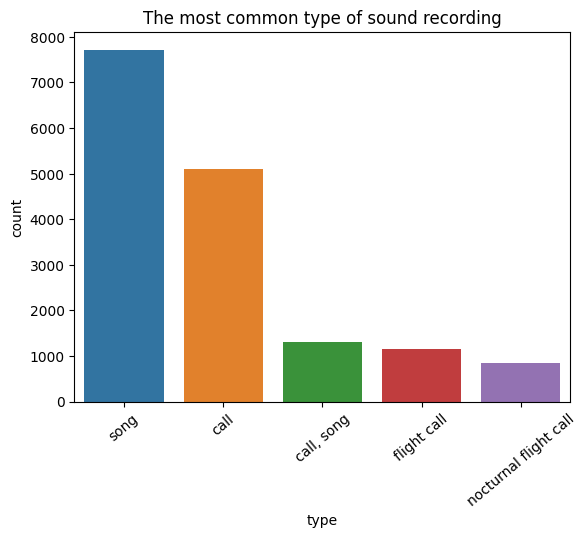

In [36]:
# The 5 most common type of sound recording

sns.countplot(x="type", data=df_ger, order=df_ger.type.value_counts().index[:5])
plt.title("The most common type of sound recording")
plt.xticks(rotation=40)

In [37]:
df_ger["type"].value_counts().head()

song                     7723
call                     5096
call, song               1308
flight call              1150
nocturnal flight call     842
Name: type, dtype: int64

In [41]:
# Number of recordings from 2006 to 2021

fig = px.histogram(df_ger, x='date')
fig.update_layout(xaxis_range=["2006-01-01", "2022-12-31"],
                 title="Number of Recordings in Germany from 2006 to 2021")
fig.show()